# Hypothesis Test

### Install Libraries

In [46]:
import pandas as pd
import numpy as np
import psycopg2 as pg
import scipy.stats as stats
import seaborn as sns

### Postgres Connection

In [2]:
conn = pg.connect("dbname=postgres user=postgres password=saude123")

### Import Data

In [3]:
## Socioeconomic States

socioeconomic_states = pd.read_sql_query ('''
select state,gdp_per_capita_2019,hdi_income_2010,hdi_education_2010,hdi_health_2010,life_expectancy_2010 from socioeconomic_states
''', conn)

dict_states_socioeconomic = {
    'Acre':'AC',
    'Amazonas':'AM',
    'Alagoas':'AL',
    'Amapá':'AP',
    'Bahia':'BA',
    'Ceará':'CE',
    'Distrito Federal':'DF',
    'Espírito Santo':'ES',
    'Goiás':'GO',
    'Maranhão':'MA',
    'Mato Grosso':'MT',
    'Mato Grosso do Sul':'MS',
    'Minas Gerais':'MG',
    'Pará':'PA',
    'Paraíba':'PB',
    'Paraná':'PR',
    'Pernambuco':'PE',
    'Piauí':'PI',
    'Rio de Janeiro':'RJ',
    'Rio Grande do Norte':'RN',
    'Rio Grande do Sul':'RS',
    'Rondônia':'RO',
    'Roraima':'RR',
    'Santa Catarina':'SC',
    'São Paulo':'SP',
    'Sergipe':'SE',
    'Tocantins':'TO'
}

dict_states_cluster = {'AC': 1,
 'AL': 0,
 'AM': 1,
 'AP': 1,
 'BA': 0,
 'CE': 0,
 'DF': 0,
 'ES': 0,
 'GO': 0,
 'MA': 1,
 'MG': 0,
 'MS': 2,
 'MT': 0,
 'PA': 1,
 'PB': 0,
 'PE': 0,
 'PI': 0,
 'PR': 0,
 'RJ': 0,
 'RN': 0,
 'RO': 0,
 'RR': 1,
 'RS': 0,
 'SC': 0,
 'SE': 0,
 'SP': 2,
 'TO': 0}

socioeconomic_states['state'] = socioeconomic_states['state'].map(dict_states_socioeconomic)
socioeconomic_states['cluster'] = socioeconomic_states['state'].map(dict_states_cluster)
socioeconomic_states

,state,gdp_per_capita_2019,hdi_income_2010,hdi_education_2010,hdi_health_2010,life_expectancy_2010,cluster
0,RO,26497.12,0.800,0.577,0.712,77.07,0
1,AC,17722.41,0.777,0.559,0.671,78.71,1
2,AM,26101.72,0.805,0.561,0.677,77.76,1
3,RR,23593.84,0.809,0.628,0.695,78.03,1
4,PA,20734.60,0.789,0.528,0.646,77.33,1
5,AP,20688.21,0.813,0.629,0.694,78.46,1
6,TO,25021.80,0.793,0.624,0.690,78.48,0
7,MA,13757.94,0.757,0.562,0.612,78.22,1
8,PI,16125.00,0.777,0.547,0.635,77.03,0
9,CE,17912.17,0.793,0.615,0.651,79.01,0


### Statistical Measures

In [33]:
dict_gdp_per_capita_2019 = dict()
dict_hdi_income_2010 = dict()
dict_hdi_education_2010 = dict()
dict_hdi_health_2010 = dict()
dict_life_expectancy_2010 = dict()
length = dict()

for i in [0,1,2]:
    dict_gdp_per_capita_2019[i] = np.array(socioeconomic_states[socioeconomic_states['cluster'] == i]['gdp_per_capita_2019'])
    dict_hdi_income_2010[i] = np.array(socioeconomic_states[socioeconomic_states['cluster'] == i]['hdi_income_2010'])                         
    dict_hdi_education_2010[i] = np.array(socioeconomic_states[socioeconomic_states['cluster'] == i]['hdi_education_2010'])                         
    dict_hdi_health_2010[i] = np.array(socioeconomic_states[socioeconomic_states['cluster'] == i]['hdi_health_2010'])                           
    dict_life_expectancy_2010[i] = np.array(socioeconomic_states[socioeconomic_states['cluster'] == i]['life_expectancy_2010'])                            

### Difference of Sample Means Distribution

Consider the sets of random variables, $\mathcal{X_1} =\{X_{11},x_{12},...,X_{1n_1}\}$ as well as $\mathcal{X_2} =\{X_{21},X_{22},...,X_{2n_2}\}$ from the second one.

By hypothesis, $X_{1i} \sim N(\mu_1,\sigma^2)$ and $X_{1i} \sim N(\mu_1,\sigma^2)$

Then, $X_1 \sim N(\mu_1,\frac{\sigma_{1}^2}{n_1})$ and $X_1 \sim N(\mu_2,\frac{\sigma_{2}^2}{n_2})$

And, $X_1 - X_2 \sim N(\mu_1 - \mu_2,\frac{\sigma_{1}^2}{n_1}+\frac{\sigma_{2}^2}{n_2})$

Subsequently, we will estimate the actual difference between averages, such as

$E[\bar{X_1} - \bar{X_2}] = \mu_1 - \mu_2$  and

$V[\bar{X_1} - \bar{X_2}] = V[\bar{X_1}] + V[\bar{X_2}] = \frac{\sigma_1^2}{n_1} + \frac{\sigma_2^2}{n_2}$

Therefore, 

Z  = $\frac{\bar{X_1} - \bar{X_2} - (\mu_1 - \mu_2)}{\sqrt{\frac{\sigma_1^2}{n_1} +\frac{\sigma_2^2}{n_2}}}\; \sim N(0,1)$





### Hypothesis Test

In [40]:
dict_results_gdp_per_capita_2019 = dict()
dict_results_hdi_income_2010 = dict()
dict_results_hdi_education_2010 = dict()
dict_results_hdi_health_2010 = dict()
dict_results_life_expectancy_2010 = dict()

for i in [0,1,2]:
    for j in [0,1,2]:
        if i < j:
            i + j
            dict_results_gdp_per_capita_2019[f"{i}_{j}"] = [stats.ttest_ind(dict_life_expectancy_2010[i],dict_life_expectancy_2010[j],equal_var = False)[0],
                                                            stats.ttest_ind(dict_life_expectancy_2010[i],dict_life_expectancy_2010[j],equal_var = False)[1]]
            dict_results_hdi_income_2010[f"{i}_{j}"] = [stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_income_2010[j],equal_var = False)[0],
                                                        stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_income_2010[j],equal_var = False)[1]]
            dict_results_hdi_education_2010[f"{i}_{j}"] = [stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_education_2010[j],equal_var = False)[0],
                                                        stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_education_2010[j],equal_var = False)[1]]
            dict_results_hdi_health_2010[f"{i}_{j}"] = [stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_health_2010[j],equal_var = False)[0],
                                                        stats.ttest_ind(dict_hdi_income_2010[i],dict_hdi_health_2010[j],equal_var = False)[1]]
            dict_results_life_expectancy_2010[f"{i}_{j}"] = [stats.ttest_ind(dict_life_expectancy_2010[i],dict_life_expectancy_2010[j],equal_var = False)[0],
                                                             stats.ttest_ind(dict_life_expectancy_2010[i],dict_life_expectancy_2010[j],equal_var = False)[1]]
        
            
                                                        

In [41]:
dict_results_gdp_per_capita_2019

{'0_1': [4.258337256489049, 0.00032235450990474425],
 '0_2': [-1.5156030987499265, 0.255071805350292],
 '1_2': [-4.946800576232848, 0.1025799816688309]}

In [42]:
dict_results_hdi_income_2010

{'0_1': [1.6683717332821388, 0.12023987617335403],
 '0_2': [-2.9936971713408176, 0.027330116850189018],
 '1_2': [-4.421981203681201, 0.006309698950144924]}

In [43]:
dict_results_hdi_education_2010

{'0_1': [12.701999975694685, 4.502785907825831e-06],
 '0_2': [3.0008959864650278, 0.19460294940413608],
 '1_2': [2.5655126684346907, 0.2216802525688429]}

In [44]:
dict_results_hdi_health_2010

{'0_1': [9.720944452207444, 7.6120527962334006e-06],
 '0_2': [1.811379530908548, 0.2906454355330618],
 '1_2': [1.0426932240983675, 0.4551880231299844]}

In [45]:
dict_results_life_expectancy_2010

{'0_1': [4.258337256489049, 0.00032235450990474425],
 '0_2': [-1.5156030987499265, 0.255071805350292],
 '1_2': [-4.946800576232848, 0.1025799816688309]}

### Explanatory Results

<AxesSubplot:xlabel='x', ylabel='y'>

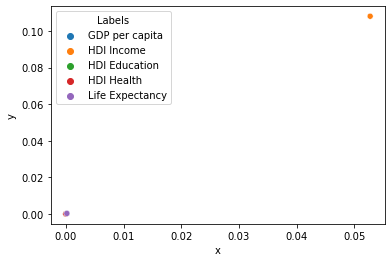

In [106]:
# cluster 0-1
x1 = np.random.uniform(0,dict_results_gdp_per_capita_2019['0_1'][1], 1)[0]
x2 = np.random.uniform(0,dict_results_hdi_income_2010['0_1'][1], 1)[0]
x3 = np.random.uniform(0,dict_results_hdi_education_2010['0_1'][1], 1)[0]
x4 = np.random.uniform(0,dict_results_hdi_health_2010['0_1'][1], 1)[0]
x5 = np.random.uniform(0,dict_results_life_expectancy_2010['0_1'][1], 1)[0]

data = pd.DataFrame({'x':[x1,x2,x3,x4,x5],
                     'y':[np.sqrt(dict_results_gdp_per_capita_2019['0_1'][1]**2 - x1**2),
                         np.sqrt(dict_results_hdi_income_2010['0_1'][1]**2 - x2**2),
                         np.sqrt(dict_results_hdi_education_2010['0_1'][1]**2 - x3**2),
                         np.sqrt(dict_results_hdi_health_2010['0_1'][1]**2 - x4**2),
                         np.sqrt(dict_results_life_expectancy_2010['0_1'][1]**2 - x5**2)],'Labels':['GDP per capita','HDI Income','HDI Education', 'HDI Health', 'Life Expectancy']})
p = sns.scatterplot(x="x", y="y",
              hue="Labels",
              data=data)
p

<AxesSubplot:xlabel='x', ylabel='y'>

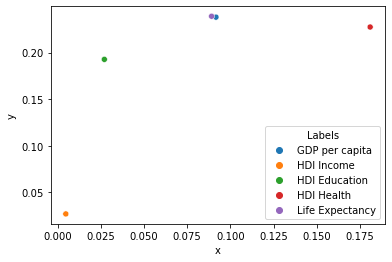

In [110]:
# cluster 0-2
x1 = np.random.uniform(0,dict_results_gdp_per_capita_2019['0_2'][1], 1)[0]
x2 = np.random.uniform(0,dict_results_hdi_income_2010['0_2'][1], 1)[0]
x3 = np.random.uniform(0,dict_results_hdi_education_2010['0_2'][1], 1)[0]
x4 = np.random.uniform(0,dict_results_hdi_health_2010['0_2'][1], 1)[0]
x5 = np.random.uniform(0,dict_results_life_expectancy_2010['0_2'][1], 1)[0]

data = pd.DataFrame({'x':[x1,x2,x3,x4,x5],
                     'y':[np.sqrt(dict_results_gdp_per_capita_2019['0_2'][1]**2 - x1**2),
                         np.sqrt(dict_results_hdi_income_2010['0_2'][1]**2 - x2**2),
                         np.sqrt(dict_results_hdi_education_2010['0_2'][1]**2 - x3**2),
                         np.sqrt(dict_results_hdi_health_2010['0_2'][1]**2 - x4**2),
                         np.sqrt(dict_results_life_expectancy_2010['0_2'][1]**2 - x5**2)],'Labels':['GDP per capita','HDI Income','HDI Education', 'HDI Health', 'Life Expectancy']})
p = sns.scatterplot(x="x", y="y",
              hue="Labels",
              x_bins= 20,
              y_bins = 20,
              data=data)
p

<AxesSubplot:xlabel='x', ylabel='y'>

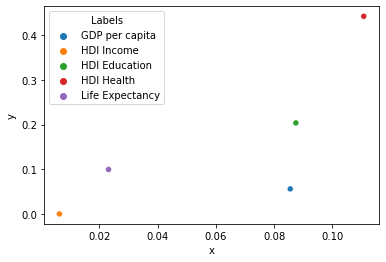

In [111]:
# cluster 1-2
x1 = np.random.uniform(0,dict_results_gdp_per_capita_2019['1_2'][1], 1)[0]
x2 = np.random.uniform(0,dict_results_hdi_income_2010['1_2'][1], 1)[0]
x3 = np.random.uniform(0,dict_results_hdi_education_2010['1_2'][1], 1)[0]
x4 = np.random.uniform(0,dict_results_hdi_health_2010['1_2'][1], 1)[0]
x5 = np.random.uniform(0,dict_results_life_expectancy_2010['1_2'][1], 1)[0]

data = pd.DataFrame({'x':[x1,x2,x3,x4,x5],
                     'y':[np.sqrt(dict_results_gdp_per_capita_2019['1_2'][1]**2 - x1**2),
                         np.sqrt(dict_results_hdi_income_2010['1_2'][1]**2 - x2**2),
                         np.sqrt(dict_results_hdi_education_2010['1_2'][1]**2 - x3**2),
                         np.sqrt(dict_results_hdi_health_2010['1_2'][1]**2 - x4**2),
                         np.sqrt(dict_results_life_expectancy_2010['1_2'][1]**2 - x5**2)],'Labels':['GDP per capita','HDI Income','HDI Education', 'HDI Health', 'Life Expectancy']})
p = sns.scatterplot(x="x", y="y",
              hue="Labels",
              data=data)
p